# Map Projections

This notebook is a modified version of M. Janosov's original, as presented in *[Geospatial Data Science Essentials](https://www.janosov.com/books/geo/)*


In geospatial analytics, we study locations on the surface of the Earth, which is three-dimensional. However, most of our analytics, as well as our printed maps and computer screens, are in two dimensions. Map projection is the collection of techniques that allows us to project the three-dimensional surface onto two-dimensional planes tailored to the specific use case we are working on, from urban planning to naval navigation. Hence, understanding and working with map projections is crucial for accurate geospatial data analysis and visualization.

Map projections enable us to represent the three-dimensional surface of the Earth on a two-dimensional plane, making it possible to create maps and perform spatial analysis. However, these transformations usually introduce distortions in various aspects of spatial data, such as distances, directions, and areas. These distortions must be managed carefully to maintain the integrity of spatial data.

In this notebook, we will explore the technical aspects of map projections, encoded in coordinate reference systems (CRS). 

- We will begin by overviewing the concept of map projections and the importance of selecting the appropriate CRS for our data.
- We will learn how to query and set the default CRS, as well as how to reproject GeoDataFrames from one CRS to another.
- We will discuss the differences between global and local CRS and introduce a selection of global projection systems to broaden our understanding.

By the end of this notebook, we will have a comprehensive overview of map projections and how to effectively manage CRS in our geospatial projects, ensuring that our spatial analyses and visualizations are both accurate and meaningful.

### 1. Querying Coordinate Reference Systems

Understanding the **coordinate reference system (CRS)** of our geospatial data is fundamental for accurate spatial analysis and visualization. The CRS defines how the two-dimensional, projected map in our GeoDataFrame is related to real places on the Earth. In this section, we overview three simple examples by querying and printing the CRS of three different built-in data sets of GeoPandas.

In [2]:
# Import the necessary library
import geopandas as gpd  
import geodatasets

# Load sample dataset of world countries and cities
file_name = 'naturalearth_cities/naturalearth_cities.shp'
# Read the saved dataset (naturalearth_cities) into a GeoDataFrame
gdf_cities = gpd.read_file(file_name)
# Load the sample dataset of world countries
file_name = 'naturalearth_lowres/naturalearth_lowres.shp'
gdf_countries = gpd.read_file(file_name)

# Load sample dataset of NYC borough boundaries
# 'bb' dataset from 'ny'
gdf_nyc = gpd.read_file(geodatasets.get_path('ny bb'))


In [3]:
# Query the CRS of each GeoDataFrame
print("CRS of world countries GeoDataFrame:")
print(gdf_countries.crs, "\n")

print("CRS of world cities GeoDataFrame:")
print(gdf_cities.crs, "\n")

print("CRS of NYC borough boundaries GeoDataFrame:")
print(gdf_nyc.crs, "\n")

CRS of world countries GeoDataFrame:
EPSG:4326 

CRS of world cities GeoDataFrame:
EPSG:4326 

CRS of NYC borough boundaries GeoDataFrame:
EPSG:2263 



This code snippet will output the CRS information of each GeoDataFrame, allowing us to understand how our spatial data is projected. By knowing the CRS, we can ensure that different spatial datasets align correctly during analysis and visualization.

### 2. Setting the Default CRS

When creating a GeoDataFrame manually, it is crucial to set the coordinate reference system (CRS) correctly to ensure accurate spatial analysis and visualization. The CRS defines how the two-dimensional, projected map in our GeoDataFrame is related to real places on the Earth. 

In this section, we will demonstrate how to set the default `CRS` of a manually created GeoDataFrame using GeoPandas. For this, we create a GeoDataFrame of cities where the cities' locations are described by their latitude and longitude coordinates. These coordinates, as shown in the previous example as well, belong to the `EPSG:4326` CRS. The EPSG:4326 standard is commonly used for geographic coordinate systems and represents coordinates in degrees of latitude and longitude based on the WGS 84 datum. Here is a little more background information:

- **EPSG**: EPSG stands for the European Petroleum Survey Group, which provides a widely used standard for defining CRS codes. EPSG codes are numerical identifiers for specific CRS definitions, allowing for consistent referencing and transformation of spatial data.
- **Latitude and Longitude**: Latitude and longitude are the geographic coordinates used to specify locations on the Earth's surface. Latitude measures the distance north or south of the Equator, while longitude measures the distance east or west of the Prime Meridian.
- **WGS 84**: WGS 84 (World Geodetic System 1984) is the standard geodetic datum used by the Global Positioning System (GPS). It provides a consistent frame of reference for measuring locations on the Earth's surface and is the basis for the EPSG:4326 CRS.



In [4]:
# Import the necessary library
from shapely.geometry import Point 

# Manually create a GeoDataFrame with city locations
data = {
    'city': ['New York', 'Los Angeles', 'Chicago'],
    'geometry': [Point(-74.006, 40.7128), 
                 Point(-118.2437, 34.0522), 
                 Point(-87.6298, 41.8781)]
}
gdf_cities = gpd.GeoDataFrame(data)

# Check the initial CRS of the GeoDataFrame (should be None)
print("There is no initial CRS of the GeoDataFrame:")
print(gdf_cities.crs, "\n")

# Set the CRS to EPSG:4326 (WGS 84)
gdf_cities.crs = 4326

# Verify that the CRS has been set correctly
print("\nCRS after setting to EPSG:4326:")
print(gdf_cities.crs, "\n")

There is no initial CRS of the GeoDataFrame:
None 


CRS after setting to EPSG:4326:
EPSG:4326 



Additionally, we show the full information panel of a GeoDataFrame by simply outputting it within the following cell.

In [5]:
gdf_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We may read the detailed CRS on the cell's output as follows. It describes the EPSG:4326, also known as WGS 84 (World Geodetic System 1984), which specifies locations using geodetic latitude and longitude, measured in degrees, with latitude ranging from -90° to 90° (south to north) and longitude from -180° to 180° (west to east). This system models the Earth's shape using the WGS 84 ellipsoid and uses the Greenwich Meridian as the prime meridian. 

### 3. Reprojecting a GeoDataFrame

Reprojecting a GeoDataFrame is an essential task in geospatial analysis, as it allows us to transform our data into a different coordinate reference system (CRS). This transformation is necessary when we need to align datasets that use different projections or when a specific analysis requires a particular CRS. 

In the following example 
- Load a sample dataset of world countries using GeoPandas' built-in dataset, which has  WGS 84 (EPSG:4326) as a default CRS, also shown earlier.
- Reproject the GeoDataFrame from its original CRS to **EPSG:3857 (Web Mercator)**, which is a popular projection used in web mapping applications, including Google Maps and OpenStreetMap.
- Use the `to_crs` method of GeoPandas.
- Output the details of the Web Mercator projection.

In [7]:
# Reproject the GeoDataFrame to EPSG:3857 (Web Mercator)
gdf_proj = gdf_countries.to_crs(3857)


# Verify the new CRS of the reprojected GeoDataFrame
print("CRS before reprojecting to EPSG:3857:")

print(gdf_countries.crs, "\n")

print("CRS after reprojecting to EPSG:3857:")

print(gdf_proj.crs, "\n")

CRS before reprojecting to EPSG:3857:
EPSG:4326 

CRS after reprojecting to EPSG:3857:
EPSG:3857 



In [8]:
gdf_proj.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As the cell output shows, we successfully reprojected the initial GeoDataFame into EPSG:3857 CRS, which is detailed above. The description tells us that this projection system, also called as Pseudo-Mercator, utilizes a Cartesian coordinate system with eastings (X) and northings (Y) measured in meters. This projection is applicable worldwide between latitudes 85.06°S and 85.06°N, with bounds extending from -180° to 180° longitude. 

### 4. Understanding Global vs. Local CRS

Selecting the appropriate coordinate reference system (CRS) is crucial in geospatial analysis, as the choice between a global or local CRS can significantly impact the accuracy and relevance of our results. 
- A global CRS, such as EPSG:4326 (WGS 84), is suitable for global datasets and visualizations but can introduce distortions in distance and area calculations.
- Conversely, a local CRS is designed for more precise measurements in a specific region, making it ideal for tasks like area computation.

In this section, we will demonstrate the differences between global and local CRSs and how to reproject a GeoDataFrame accordingly.

We will illustrate these differences through map visualizations and area computations, focusing on France as an example. We will visualize the country-wide map of France and the original world map using both the global CRS (EPSG:4326) and a local CRS (EPSG:9793) specific to France. These comparisons will clearly show how each projection affects the representation of geographic features in different parts of the world, and how pronounced distortions can occur when an inappropriate CRS is used.

After the visual demonstration, we will move on to computing areas, as accurate area computation is a critical consideration when choosing between a global and local CRS. Area calculations in a global CRS like EPSG:4326 can be highly inaccurate due to the distortions inherent in global projections. Local CRSs, however, are designed to minimize these distortions in specific regions, making them suitable for precise area measurements. In our example, we will compute the area of Hungary in both global and local CRSs to highlight the importance of using an appropriate CRS for accurate measurements. 

This exercise underscores the necessity of selecting the right CRS for geospatial analyses to ensure the integrity and reliability of the results.

In [9]:
# Import the necessary library
import matplotlib.pyplot as plt  # Import the plotting library


# Define the local CRS for Germany (EPSG:4839)
crs_ger = 4839
germany = gdf_countries[gdf_countries.name == 'Germany']
germany_ger = germany.to_crs(crs_ger)
germany_ger.crs

<Projected CRS: EPSG:4839>
Name: ETRS89 / LCC Germany (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Germany - onshore - states of Baden-Wurtemberg, Bayern, Berlin, Brandenburg, Bremen, Hamburg, Hessen, Mecklenburg-Vorpommern, Niedersachsen, Nordrhein-Westfalen, Rheinland-Pfalz, Saarland, Sachsen, Sachsen-Anhalt, Schleswig-Holstein, Thuringen.
- bounds: (5.86, 47.27, 15.04, 55.09)
Coordinate Operation:
- name: LCC Germany
- method: Lambert Conic Conformal (2SP)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'World in Local CRS (EPSG:9793) with Germany Highlighted')

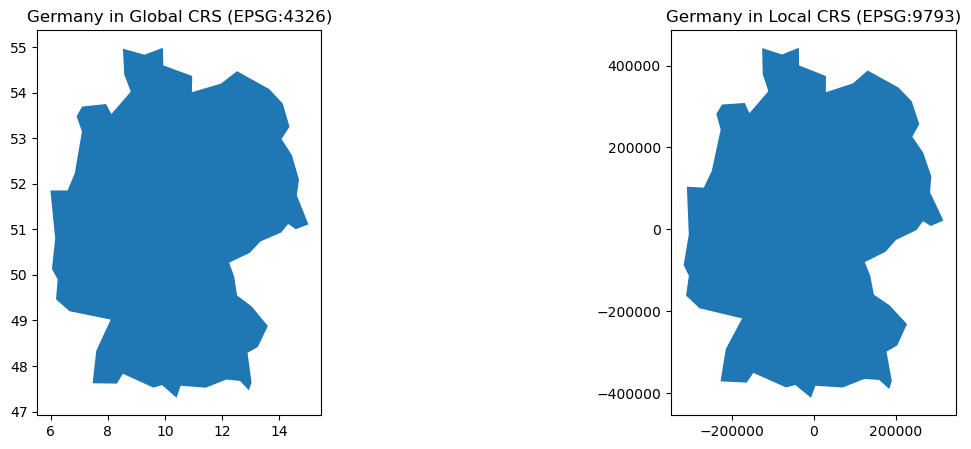

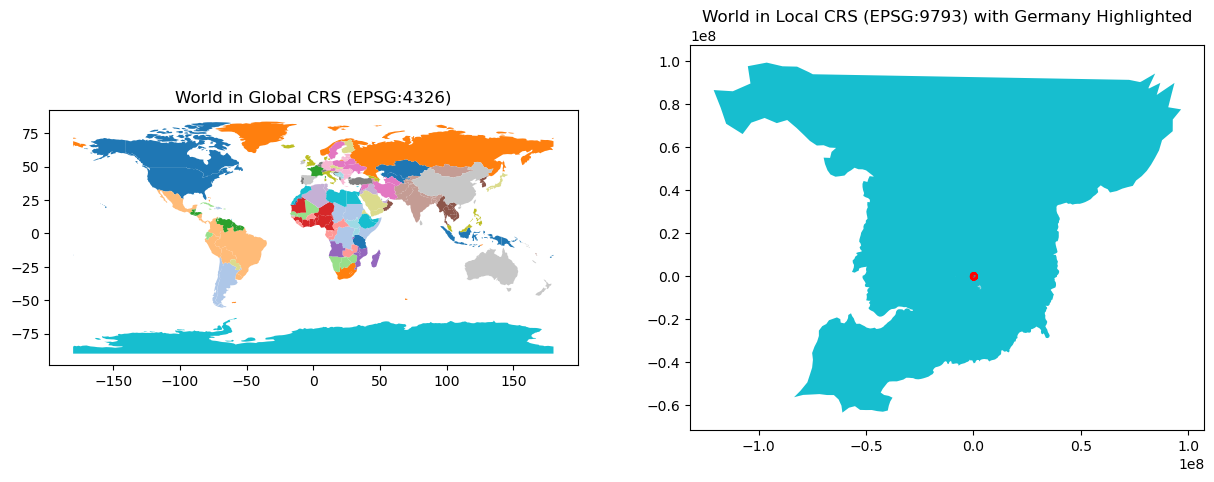

In [12]:
# Plot Germany in global and local CRS
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
germany.plot(ax=ax[0])
germany_ger.plot(ax=ax[1])
ax[0].set_title('Germany in Global CRS (EPSG:4326)')
ax[1].set_title('Germany in Local CRS (EPSG:9793)')

# Reproject the entire GeoDataFrame to the local CRS
gdf_ger = gdf_countries.to_crs(crs_ger)

# Plot the world in global CRS and Germany in local CRS
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
gdf_countries.plot(ax=ax[0], cmap = 'tab20')
gdf_ger.plot(ax=ax[1], cmap = 'tab20')
germany_ger.plot(ax=ax[1], color='red', linewidth=5, edgecolor='red')
ax[0].set_title('World in Global CRS (EPSG:4326)')
ax[1].set_title('World in Local CRS (EPSG:9793) with Germany Highlighted')

In [13]:
# Compute the area of Germany in global CRS (EPSG:4326)
germany['area_global'] = germany.geometry.area
print(f"Area of Germany in global CRS (EPSG:4326): \
    {germany['area_global'].values[0]}", "\n")

# Compute the area of Germany in local CRS (EPSG:23700)
germany_ger['area_local'] = germany_ger.geometry.area
print(f"Area of France in local CRS (EPSG:23700): \
    {germany_ger['area_local'].values[0]}", "\n")

Area of Germany in global CRS (EPSG:4326):     45.92359430736882 

Area of France in local CRS (EPSG:23700):     357128955110.05963 



/var/folders/kx/_1g1vzv51nq1yv81c377flsr0000gn/T/ipykernel_65141/1649704899.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  germany['area_global'] = germany.geometry.area
/opt/miniconda3/envs/geo_env/lib/python3.13/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


The results of the previous code blocks illustrate some similarities but also striking differences between local and global CRS. First, we observe that using the local CRS for France does not alter the shape of the country at all. However, a closer look at the axis labeling reveals a switch from longitude and latitude coordinates to SI units, with length measured in meters. This demonstrates the suitability of the local CRS for Hungary. 

Conversely, when applying the local CRS of Germany to the entire planet, the results are dramatically different. The map becomes distorted, centered around France, and countries are positioned in completely unrecognizable places, highlighting the inadequacy of a local Hungarian CRS for global datasets.

The differences become even more pronounced when computing the area of France. In EPSG:4326, the area calculation is ambiguous and inaccurate, yielding a value of around 45.92 in rather arbitrary units of measure. This value is rather far from the official 357,592 km² area of the country's official area, which, on the other hand, aligns well with the area computed using the local CRS. 

This discrepancy underscores the inaccuracy of area calculations in a global CRS. In contrast, using a local CRS provides an area measurement much closer to the official value, highlighting the importance of selecting the appropriate CRS for precise geospatial analysis.

### 5. Additional Projection Systems


Understanding and using different map projection systems is crucial for various geospatial applications. Each projection system has unique properties and uses, making it suitable for specific types of spatial analysis and visualization. In this section, we will explore the following additional projection systems, demonstrating how to apply them to a GeoDataFrame using GeoPandas and how to visualize a world map transformed into these CRS:

- **Eckert II:** An equal-area pseudocylindrical projection used for world maps, known for reducing distortion of area and shape.
- **Equirectangular:** A simple equidistant cylindrical projection often used in raster data sets.
- **Mollweide:** An equal-area projection used for global maps, minimizing area distortion in exchange for shape distortions. Generally used for maps of the world or celestial sphere.
- **Natural Earth:** A pseudocylindrical projection designed for world maps, balancing shape and area distortion.

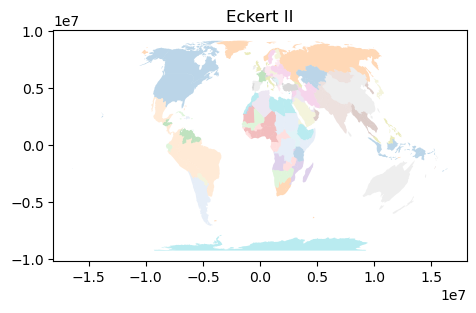

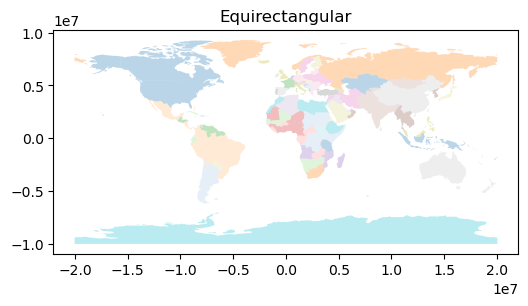

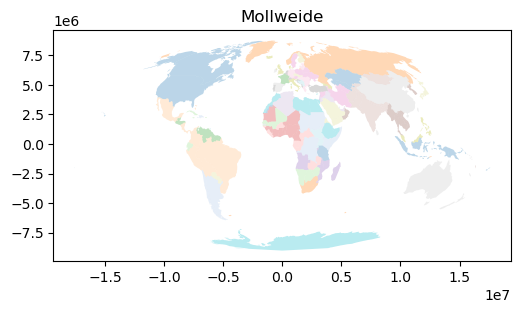

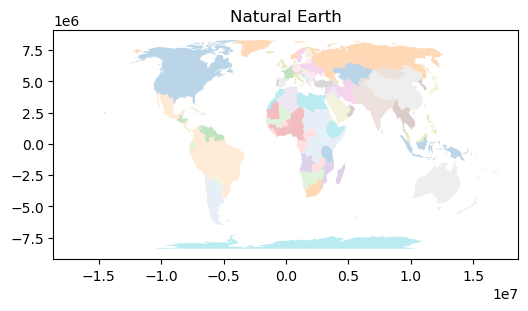

In [14]:
# Define a dictionary of projection systems 
# with their corresponding PROJ strings
projection_systems = {
    'Eckert II': '+proj=eck2 +lon_0=0 +x_0=0 +y_0=0 \
                  +datum=WGS84 +units=m +no_defs',
    'Equirectangular': '+proj=eqc +lon_0=0 +lat_ts=0 \
                        +x_0=0 +y_0=0 +a=6378137 +b=6378137 \
                        +units=m +no_defs',
    'Mollweide': '+proj=moll +lon_0=0 +x_0=0 +y_0=0 \
                  +datum=WGS84 +units=m +no_defs',
    'Natural Earth': '+proj=eqearth +lon_0=0 +x_0=0 +y_0=0 \
                      +datum=WGS84 +units=m +no_defs',
}

# Apply each projection system to the GeoDataFrame and plot the results
for system_name, system_code in projection_systems.items():
    gdf_proj = gdf_countries.to_crs(system_code)
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    gdf_proj.plot(ax=ax, linewidth=1.5, alpha=0.3, cmap='tab20')
    ax.set_title(system_name)

plt.show()

By exploring these (and further) additional projection systems, we can select the most appropriate projection for our specific geospatial analysis and visualization needs, ensuring accurate and meaningful representations of our spatial data.

### 6. Transforming Coordinates Directly


While we have already seen how to transform entire GeoDataFrames from one CRS to another, directly transforming coordinates between different coordinate reference systems (CRS) is just as much of a fundamental task in geospatial analysis. In this section, we will demonstrate how to transform coordinates using directly the [pyproj](https://pyproj4.github.io/pyproj/stable/) library in Python.

Steps:

- load the usual sample dataset of world countries using GeoPandas' built-in dataset
- select, for example, the records of Hungary and compute its centroid in the global CRS (EPSG:4326).
- extract the two coordinates from the centroid geometry and use the `Transformer` class from `pyproj` to convert coordinates from EPSG:4326 to EPSG:3857 and then from EPSG:3857 EPSG:23700.


In [15]:
import geopandas as gpd  # Import the necessary library
from pyproj import Transformer  # Import the Transformer class from pyproj

# Load a sample dataset of world countries

# Get the centroid of Hungary
hungary = gdf_countries[gdf_countries.name == 'Hungary']
print("Centroid of Hungary in global CRS (EPSG:4326):")
print(hungary.centroid, "\n")
centroid = hungary.centroid.geometry.iloc[0]

# Extract the latitude and longitude for a Hungary's centroid
lat = centroid.xy[1][0]
lon = centroid.xy[0][0]

# Create a transformer object to convert from EPSG:4326 to EPSG:3857
transformer = Transformer.from_crs("EPSG:4326", "EPSG:3857")

# Transform the coordinates to EPSG:3858
x, y = transformer.transform(lat, lon)
print(f"\nOriginal coordinates (EPSG:4326): ({lat}, {lon})", "\n")
print(f"Transformed coordinates (EPSG:3857): ({x}, {y})", "\n")

Centroid of Hungary in global CRS (EPSG:4326):
115    POINT (19.35763 47.19995)
dtype: geometry 


Original coordinates (EPSG:4326): (47.19995117195427, 19.357628627745918) 

Transformed coordinates (EPSG:3857): (2154881.3618059703, 5974772.482175054) 



/var/folders/kx/_1g1vzv51nq1yv81c377flsr0000gn/T/ipykernel_65141/1809193596.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  print(hungary.centroid, "\n")
/var/folders/kx/_1g1vzv51nq1yv81c377flsr0000gn/T/ipykernel_65141/1809193596.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = hungary.centroid.geometry.iloc[0]


In [16]:
# Create a transformer object to convert from EPSG:3857 to EPSG:23700
transformer = Transformer.from_crs("EPSG:3857", "EPSG:23700")

# Transform the EPSG:3857 coordinates to EPSG:23700
x2, y2 = transformer.transform(x, y)
print(f"Original coordinates (EPSG:4326): ({x}, {y})", "\n")
print(f"Transformed coordinates (EPSG:23700): ({x2}, {y2})", "\n")

Original coordinates (EPSG:4326): (2154881.3618059703, 5974772.482175054) 

Transformed coordinates (EPSG:23700): (673501.117446037, 206252.3436073597) 



Directly transforming coordinates between different CRSs ensures that spatial data is accurately projected and aligned, even if not organized into higher-level data structures, such as a GeoDataFrame. By understanding how to use the `pyproj` library for coordinate transformation, we can now handle various geospatial data formats in a flexible way.

### 7. Obtaining EPSG Codes

EPSG codes, as we have seen across this chapter, are unique identifiers for different coordinate reference systems (CRS), making them essential for accurate geospatial data management and transformation. These codes ensure that spatial data can be correctly projected and analyzed. In this section, we will explore how to obtain EPSG codes specific to different locations using simple web scraping.

#### Online Resources for EPSG Codes
- [EPSG.io](http://epsg.io): A comprehensive online database of coordinate reference systems. We can search for EPSG codes by location, name, or CRS properties. Here, we may browse EPSG codes manually as well.
- [MapTiler API](https://docs.maptiler.com/cloud/api): An API provided by MapTiler that allows us to search for coordinate reference systems by location. We need to create an account and obtain an API key to use this service.

Below is an example of how to obtain EPSG codes using the MapTiler API. First, make sure to sign up for the [MapTiler API](https://cloud.maptiler.com/account/keys/) and get our key after a simple free registration. Then, copy-paste our own key to the `key` variable and run the rest of the code cell. This code will use the [requests](https://pypi.org/project/requests/) library to make the API call and retrieve the JSON response from which we can extract and print the EPSG code information.

```python
# Import the necessary library
import requests 

# Replace with your MapTiler API key
key = <place your API key here>'
place = 'Hungary'

# Construct the API request URL
url = f'https://api.maptiler.com/coordinates/search/{place}.json?key={key}'

# Make the API request
response = requests.get(url)
data = response.json()

# Print the first two results
print("First result for Hungary:")
print(data['results'][0], "\n")

print("\nSecond result for Hungary:")
print(data['results'][1], "\n")

# Repeat the process for New York
place = 'New_York'
url = f'https://api.maptiler.com/coordinates/search/{place}.json?key={key}'
response = requests.get(url)
data = response.json()

print("\nFirst result for New York:")
print(data['results'][0], "\n")

print("\nSecond result for New York:")
print(data['results'][1], "\n")
```


By using online resources and APIs like MapTiler, we can efficiently obtain EPSG codes for various locations, ensuring that our geospatial data is correctly referenced and projected. This capability is essential for accurate geospatial analysis and data management.


### Summary on Map Projections

In this notebook, we reviewed the essential concepts and techniques related to map projections, which are fundamental for accurate geospatial analysis and visualization. We began by understanding the importance of coordinate reference systems (CRS) and how to query them for different GeoDataFrames. 

We then explored how to set the default CRS for manually created GeoDataFrames and how to transform data into different CRSs to suit various analytical needs. We also examined the differences between global and local CRSs, using Hungary as an example to show how different projections impact spatial representations and measurements. 

Furthermore, we introduced a variety of additional projection systems and covered the direct transformation of coordinates using the `pyproj` library, providing practical examples of how to convert between different CRSs for accurate spatial analysis. Lastly, we discussed methods for obtaining EPSG codes, utilizing online resources and APIs like MapTiler to find the appropriate CRS for different locations.

Through these sections, we equipped ourselves with a comprehensive understanding of map projections and CRS management, ensuring that our geospatial data analyses are accurate and meaningful. This knowledge is crucial for anyone working in fields such as urban planning, environmental science, and geographic information systems (GIS), where precise spatial data handling and the merging of different data sources is essential.

## Exercises

1. Find the necessary codes for the Philippines.
2. Repeat all the notebook sections for the Philippines, or for your choice of island(s)